## Observations and Insights 

In [50]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "Resources/Mouse_metadata.csv"
study_results_path = "Resources/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_data_df = pd.merge(left= mouse_metadata, right = study_results, on = "Mouse ID", how = "outer")

# Display the data table for preview
mouse_study_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1


In [51]:
# Checking the number of mice.
mouse_study_data_df["Mouse ID"].count()

1893

In [52]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

has_duplicate = mouse_study_data_df["Mouse ID"].duplicated()
duplicates = mouse_study_data_df[has_duplicate]
duplicate_mouseid_timepoint_df = duplicates[["Mouse ID", "Timepoint"]]
duplicate_mouseid_timepoint_df.head()

,Mouse ID,Timepoint
1,k403,5
2,k403,10
3,k403,15
4,k403,20
5,k403,25


In [53]:
# Optional: Get all the data for the duplicate mouse ID. 

all_duplicate_mouseid_df = duplicates
all_duplicate_mouseid_df


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
5,k403,Ramicane,Male,21,16,25,33.464577,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [61]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df = mouse_study_data_df.drop_duplicates(["Mouse ID"])
clean_mouse_study_df.head()
# clean_mouse_study_df.columns

Index(['Mouse ID', 'Drug Regimen', 'Sex', 'Age_months', 'Weight (g)',
       'Timepoint', 'Tumor Volume (mm3)', 'Metastatic Sites'],
      dtype='object')

In [55]:
# Checking the number of mice in the clean DataFrame.
clean_mouse_study_df["Mouse ID"].count()

249

## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method is the most straighforward, creating multiple series and putting them all together at the end.



In [8]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function


## Bar and Pie Charts

In [69]:
help(plt.figure)

Help on function figure in module matplotlib.pyplot:

figure(num=None, figsize=None, dpi=None, facecolor=None, edgecolor=None, frameon=True, FigureClass=<class 'matplotlib.figure.Figure'>, clear=False, **kwargs)
    Create a new figure.
    
    Parameters
    ----------
    num : integer or string, optional, default: None
        If not provided, a new figure will be created, and the figure number
        will be incremented. The figure objects holds this number in a `number`
        attribute.
        If num is provided, and a figure with this id already exists, make
        it active, and returns a reference to it. If this figure does not
        exists, create it and returns it.
        If num is a string, the window title will be set to this figure's
        `num`.
    
    figsize : (float, float), optional, default: None
        width, height in inches. If not provided, defaults to
        :rc:`figure.figsize` = ``[6.4, 4.8]``.
    
    dpi : integer, optional, default: None
   

ValueError: shape mismatch: objects cannot be broadcast to a single shape

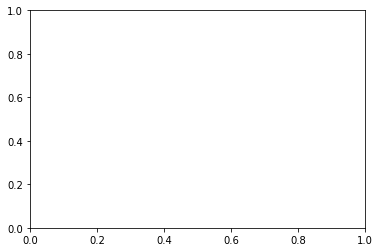

In [72]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 
x_axis = np.arange(len(clean_mouse_study_df["Drug Regimen"]))
y_axis = clean_mouse_study_df.groupby(["Drug Regimen"])["Mouse ID"].count()


plt.bar(x_axis, y_axis, color = "r", align = "edge")


In [10]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.



In [11]:
# Generate a pie plot showing the distribution of female versus male mice using pandas



In [12]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot



## Quartiles, Outliers and Boxplots

In [13]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


In [14]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    

In [15]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


## Line and Scatter Plots

In [16]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin


In [17]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


## Correlation and Regression

In [18]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
